In [125]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [126]:
df = pd.read_csv('Property_Sales_History_Property_Sales_History.csv',parse_dates=['SALEDATE'])

C:\Users\PRATHAM\AppData\Local\Temp\ipykernel_9112\2100943657.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Property_Sales_History_Property_Sales_History.csv',parse_dates=['SALEDATE'])


In [127]:
df.head()

,PARCELNO,PROPCLASS,PROPADDR,SALEDATE,SALEPRICE,SALENO,GRANTEE,GRANTOR,SalesInstr,PROPNO,PROPDIR,PROPSTR,PROPZIP,SALETERMS
0,22123947.,401,NaN,2016-03-02,$1.00,1,"HALL, EDWARD","LAURA, TRINA",QC,18624,NaN,WINSTON,48219,REVIEW NEEDED
1,21015633.010,401,NaN,2016-03-02,$5000.00,1,"ANDERSON, ANTONIO","WARE, EDISON",QC,18694,NaN,ALCOY,48205,REVIEW NEEDED
2,17007012.,404,NaN,2016-03-02,NaN,1,NaN,"HASKA, WILLIAM",WD,2130,NaN,IROQUOIS,48214,REVIEW NEEDED
3,21042739.,401,NaN,2016-03-02,$1.00,1,"HERBERT, WILLIE JR","HERBERT, CLARA L",PTA,3960,NaN,LILLIBRIDGE,48214,NQ
4,21077568-9,401,NaN,2016-03-02,$4400.00,1,"MASON, CHARLES ANTHONY","MUMPHORD, TAHNIA",PTA,5036,NaN,MARSEILLES,48224,REVIEW NEEDED


In [128]:
#the SALEPRICE here is in string and has "$" prefix. so first replacing "$" with empty space
df['SALEPRICE'] = df['SALEPRICE'].str.replace('$', '')

#now typecasting the string to float
df['SALEPRICE'] = df['SALEPRICE'].astype(float)

C:\Users\PRATHAM\AppData\Local\Temp\ipykernel_9112\533734603.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['SALEPRICE'] = df['SALEPRICE'].str.replace('$', '')


In [129]:
#filling the null values using the interpolate method(try using other methods like linear, quadratic instead of cubic)
df['SALEPRICE'].interpolate(method='cubic', inplace=True)
df2 = df[['SALEDATE','SALEPRICE']]
df2

,SALEDATE,SALEPRICE
0,2016-03-02,1.000000
1,2016-03-02,5000.000000
2,2016-03-02,7495.056193
3,2016-03-02,1.000000
4,2016-03-02,4400.000000
...,...,...
601993,2004-05-19,73267.000000
601994,1995-02-01,192500.000000
601995,1994-07-01,29500.000000
601996,2002-07-26,284000.000000


In [130]:
#grouping the data based upon dates and adding all the SALEPRICE of the single date
grouped_df = df.groupby(['SALEDATE'])['SALEPRICE'].sum()

#resetting the index
grouped_df = grouped_df.reset_index()
grouped_df

,SALEDATE,SALEPRICE
0,1990-01-01,2.773971e+07
1,1990-01-04,1.000000e+00
2,1990-01-08,3.032900e+04
3,1990-01-09,1.960025e+04
4,1990-01-16,2.090000e+04
...,...,...
7753,2016-02-26,4.853979e+05
7754,2016-02-27,-1.483918e+03
7755,2016-02-29,1.000700e+04
7756,2016-03-01,1.138824e+04


In [131]:
grouped_df = grouped_df.set_index('SALEDATE')
grouped_df

,SALEPRICE
SALEDATE,
1990-01-01,2.773971e+07
1990-01-04,1.000000e+00
1990-01-08,3.032900e+04
1990-01-09,1.960025e+04
1990-01-16,2.090000e+04
...,...
2016-02-26,4.853979e+05
2016-02-27,-1.483918e+03
2016-02-29,1.000700e+04


In [132]:
grouped_df['SALEPRICE'] = grouped_df['SALEPRICE'].round(2)
grouped_df

,SALEPRICE
SALEDATE,
1990-01-01,27739706.32
1990-01-04,1.00
1990-01-08,30329.00
1990-01-09,19600.25
1990-01-16,20900.00
...,...
2016-02-26,485397.91
2016-02-27,-1483.92
2016-02-29,10007.00


22837984732.92


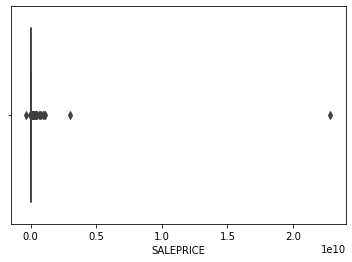

In [133]:
import seaborn as sns
sns.boxplot(x=grouped_df["SALEPRICE"])
print(grouped_df["SALEPRICE"].max())

In [134]:
grouped_df = grouped_df[grouped_df['SALEPRICE'] < 0.25e10]

<AxesSubplot: xlabel='SALEPRICE'>

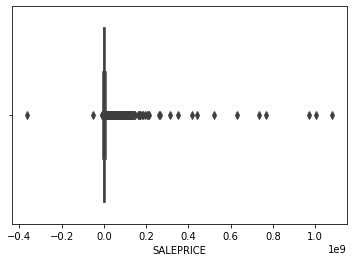

In [135]:
grouped_df
sns.boxplot(x=grouped_df["SALEPRICE"])

In [136]:
grouped_df = grouped_df[grouped_df.SALEPRICE >= 0]

<AxesSubplot: xlabel='SALEPRICE'>

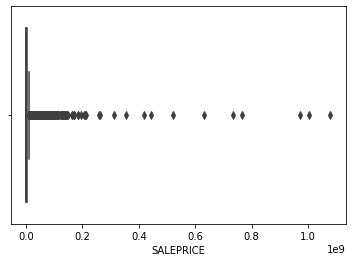

In [137]:
sns.boxplot(x=grouped_df["SALEPRICE"])

In [138]:
grouped_df = grouped_df[grouped_df.SALEPRICE <= 0.25e9]

<AxesSubplot: xlabel='SALEPRICE'>

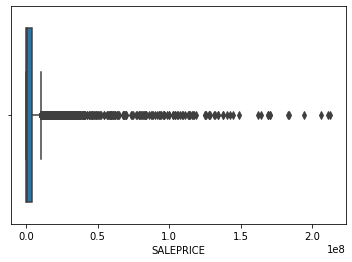

In [139]:
sns.boxplot(x=grouped_df["SALEPRICE"])

In [154]:
grouped_df = grouped_df[grouped_df.SALEPRICE <= 1.5e8]

<AxesSubplot: xlabel='SALEPRICE'>

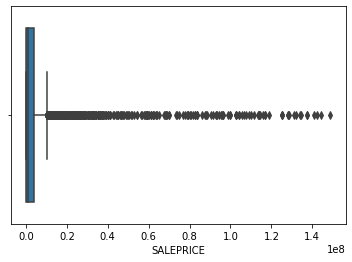

In [155]:
sns.boxplot(x=grouped_df["SALEPRICE"])

In [156]:
#checking for any null values:

null_values = grouped_df["SALEPRICE"].isnull().sum()
null_values

0

In [157]:
grouped_df = grouped_df.sort_index()
grouped_df

,SALEPRICE
SALEDATE,
1990-01-01,27739706.32
1990-01-04,1.00
1990-01-08,30329.00
1990-01-09,19600.25
1990-01-16,20900.00
...,...
2016-02-25,358947.91
2016-02-26,485397.91
2016-02-29,10007.00


In [158]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
ad_test(grouped_df['SALEPRICE'])

1. ADF :  -9.53090876816421
2. P-Value :  2.8925832561790335e-16
3. Num Of Lags :  34
4. Num Of Observations Used For ADF Regression: 7309
5. Critical Values :
	 1% :  -3.4312450058978676
	 5% :  -2.8619355233322374
	 10% :  -2.566980532811698


In [159]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(grouped_df['SALEPRICE'], trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=3.53 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=265238.316, Time=0.19 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=263233.095, Time=0.42 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.25 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=265236.317, Time=0.14 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=262446.351, Time=0.54 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=262011.263, Time=0.74 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=261703.533, Time=0.92 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=261412.231, Time=1.07 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=6.74 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=5.59 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=261410.232, Time=0.92 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=261701.533, Time=0.79 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=inf, Time=5.20 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AI

# Fitting arima model

### Dividing the data between training and testing

In [160]:
from statsmodels.tsa.arima.model import ARIMA

In [161]:
print(grouped_df.shape)
train=grouped_df.iloc[:-300]
test=grouped_df.iloc[-300:]
print(train.shape,test.shape)

(7344, 1)
(7044, 1) (300, 1)


#### Fitting the model

In [162]:
# model=ARIMA(train['SALEPRICE'],order=(5,1,0))
model=ARIMA(train['SALEPRICE'],order=(5,1,0))

C:\Users\PRATHAM\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PRATHAM\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PRATHAM\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [163]:
model=model.fit()

In [164]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              SALEPRICE   No. Observations:                 7044
Model:                 ARIMA(5, 1, 0)   Log Likelihood             -125441.868
Date:                Sun, 29 Jan 2023   AIC                         250895.737
Time:                        18:35:51   BIC                         250936.896
Sample:                             0   HQIC                        250909.915
                               - 7044                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8104      0.008    -98.436      0.000      -0.826      -0.794
ar.L2         -0.6473      0.011    -59.953      0.000      -0.668      -0.626
ar.L3         -0.5001      0.012    -42.112      0.000      -0.523      -0.477
ar.L4         -0.3561      0.011    -32.580      0.000      -0.377      -0.335
ar.L5         -0.1977      0.008    -25.817      0.000      -0.213      -0.183
sigma2       1.73e+14   2.76e-18   6.26e+31      0.000    1.73e+14    1.73e+14
===================================================================================
Ljung-Box (L1) (Q):                   9.44   Jarque-Bera (JB):            633783.36
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.21   Skew:                             5.63
Prob(H) (two-sided):                  0.00   Kurtosis:                        48.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.49e+47. Standard errors may be unstable.
"""

In [114]:
# grouped_df = grouped_df.reset_index()
# grouped_df

# to be deleted

,SALEDATE,SALEPRICE
0,1990-01-01,27739706.32
1,1990-01-04,1.00
2,1990-01-08,30329.00
3,1990-01-09,19600.25
4,1990-01-16,20900.00
...,...,...
7351,2016-02-25,358947.91
7352,2016-02-26,485397.91
7353,2016-02-29,10007.00
7354,2016-03-01,11388.24


In [165]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')

pred.index = grouped_df.index[start:end+1]
pred_df = pd.DataFrame(pred)
# pred_df
print(pred)

SALEDATE
2015-04-30    1.081659e+06
2015-05-01    8.693101e+05
2015-05-02    9.523240e+05
2015-05-03    1.126657e+06
2015-05-04    1.156477e+06
                  ...     
2016-02-25    1.058710e+06
2016-02-26    1.058710e+06
2016-02-29    1.058710e+06
2016-03-01    1.058710e+06
2016-03-02    1.058710e+06
Name: ARIMA Predictions, Length: 300, dtype: float64


C:\Users\PRATHAM\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [166]:
pred_df

,ARIMA Predictions
SALEDATE,
2015-04-30,1.081659e+06
2015-05-01,8.693101e+05
2015-05-02,9.523240e+05
2015-05-03,1.126657e+06
2015-05-04,1.156477e+06
...,...
2016-02-25,1.058710e+06
2016-02-26,1.058710e+06
2016-02-29,1.058710e+06


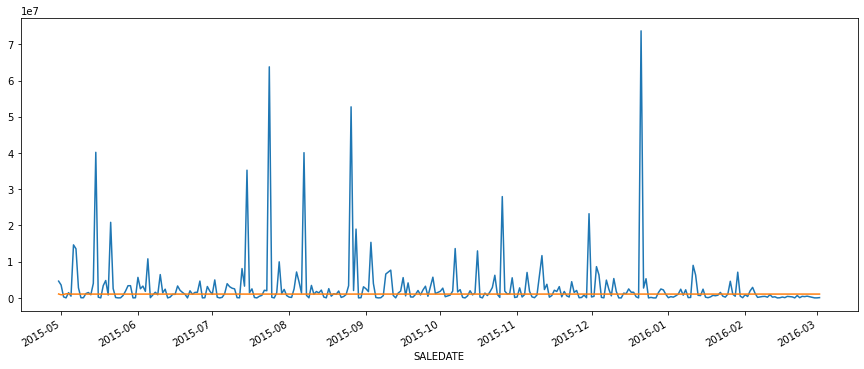

In [167]:
# grouped_df.iloc[-300:].plot(x=grouped_df.index, y='SALEPRICE')

# pred_df.plot(x=pred_df.index, y='ARIMA Predictions')


ax = grouped_df['SALEPRICE'].iloc[-300:].plot(figsize=(15,6))

# Add another plot on the same figure
pred_df['ARIMA Predictions'].plot(ax=ax)

plt.show()


In [168]:
pred_df.tail(100)

,ARIMA Predictions
SALEDATE,
2015-11-21,1.058710e+06
2015-11-22,1.058710e+06
2015-11-23,1.058710e+06
2015-11-24,1.058710e+06
2015-11-25,1.058710e+06
...,...
2016-02-25,1.058710e+06
2016-02-26,1.058710e+06
2016-02-29,1.058710e+06
